# Import data

In [1]:
import pandas as pd

df_tissue = pd.read_csv('./dataset/dataset_tissue.txt',sep=',',index_col=0)
df_clases = pd.read_csv('./dataset/clase.txt',sep=',',index_col=0)

# PCA

In [2]:
from sklearn.decomposition import PCA

df_tissue_transposed = df_tissue.T
n_components = 70
pca = PCA(n_components=n_components)
dt_tissue_pca = pca.fit_transform(df_tissue_transposed)

# K-means

In [3]:
import numpy as np

def distance(v1, v2):
    return np.linalg.norm(v1 - v2)

def init_centroids(data, k):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    return centroids

def assign_clusters(data, centroids):
    return np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)

def update_centroids(data, clusters, k):
    new_centroids = np.array([data[clusters == i].mean(axis=0) if np.sum(clusters == i) != 0 else data[np.random.choice(data.shape[0], 1)][0] for i in range(k)])
    return new_centroids

def average_centroid_distance(old_centroids, new_centroids):
    return np.mean([distance(old_centroids[i], new_centroids[i]) for i in range(len(old_centroids))])

def kmeans(data, k, threshold):
    centroids = init_centroids(data, k)
    clusters = assign_clusters(data, centroids)
    new_centroids = update_centroids(data, clusters, k)
    
    while average_centroid_distance(centroids, new_centroids) > threshold:
        centroids = new_centroids
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
    
    return new_centroids, clusters


In [4]:
k = 7  # Número de clústeres deseado
umbral = 0.8  # Umbral para la convergencia
centroides, clusters = kmeans(dt_tissue_pca, k, umbral)

# Visualización de clústeres

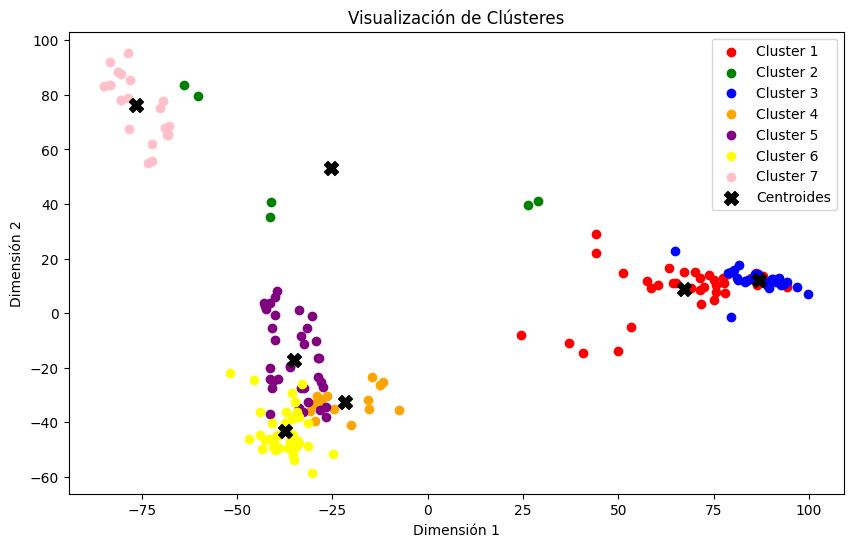

In [5]:
import matplotlib.pyplot as plt

colores = ['red', 'green', 'blue', 'orange', 'purple', 'yellow', 'pink']

plt.figure(figsize=(10, 6))

for cluster_id in range(k): 
    cluster_points = dt_tissue_pca[clusters == cluster_id]  
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], c=colores[cluster_id], label=f'Cluster {cluster_id+1}')

plt.scatter(centroides[:, 0], centroides[:, 1], s=100, c='black', marker='X', label='Centroides')

plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Visualización de Clústeres')
plt.legend()

plt.show()
